In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    cohen_kappa_score,
)

In [3]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [4]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [5]:
# Apply SMOTE to your dataset (Assuming you've already imported SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Create and train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

In [25]:
# Define a binary classification problem for class 20 vs. the rest
class_20_binary = (y_test == 20)
y_pred_class_20 = y_pred[class_20_binary]
y_true_class_20 = y_test[class_20_binary]

In [27]:
# Calculate Sensitivity (True Positive Rate)
sensitivity = recall_score(y_true_class_20, y_pred_class_20, pos_label=20)


In [29]:
# Calculate Specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(y_true_class_20, y_pred_class_20).ravel()
if tn + fp == 0:
    specificity = 0.0  # Handle division by zero
else:
    specificity = tn / (tn + fp)

In [32]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Calculate ROC AUC for class 10 vs. class 20
roc_auc_class_10_20 = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Display ROC AUC for class 10 vs. class 20
print(f"ROC AUC for Class 10 vs. Class 20: {roc_auc_class_10_20:.2f}")

ROC AUC for Class 10 vs. Class 20: 0.94


In [33]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [34]:
# Calculate Precision
precision = precision_score(y_test, y_pred, pos_label=20)  # Adjust pos_label to match your dataset

In [35]:
# Calculate Recall
recall = recall_score(y_test, y_pred, pos_label=20)  # Adjust pos_label to match your dataset

In [36]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, pos_label=20)  # Adjust pos_label to match your dataset

In [37]:
# Calculate Kappa Statistics
kappa = cohen_kappa_score(y_test, y_pred)

Confusion Matrix (Actual vs. Predicted):
            Predicted 10  Predicted 20
Actual 10          1137           190
Actual 20           221          1124


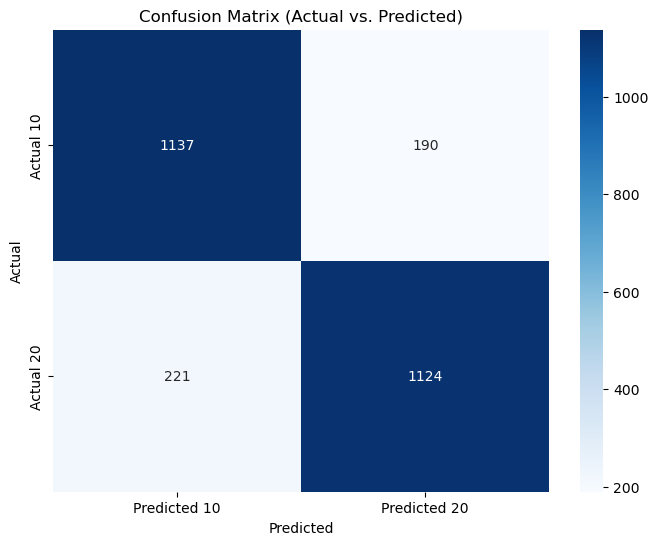

In [40]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a labeled confusion matrix
confusion_df = pd.DataFrame(conf_matrix, columns=["Predicted 10", "Predicted 20"], index=["Actual 10", "Actual 20"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_df)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")
plt.show()

In [41]:
# Classification Report
class_report = classification_report(y_test, y_pred)

In [44]:
# Display metrics
print(f"Sensitivity (True Positive Rate): {sensitivity:.2f}")
print(f"Specificity (True Negative Rate): {specificity:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Kappa Statistics: {kappa:.2f}")

# Display Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display Classification Report
print("Classification Report:")
print(class_report)

Sensitivity (True Positive Rate): 0.84
Specificity (True Negative Rate): 0.00
ROC AUC: 0.94
Accuracy: 0.85
Precision: 0.86
Recall: 0.84
F1 Score: 0.85
Kappa Statistics: 0.69
Confusion Matrix:
[[1137  190]
 [ 221 1124]]
Classification Report:
              precision    recall  f1-score   support

          10       0.84      0.86      0.85      1327
          20       0.86      0.84      0.85      1345

    accuracy                           0.85      2672
   macro avg       0.85      0.85      0.85      2672
weighted avg       0.85      0.85      0.85      2672



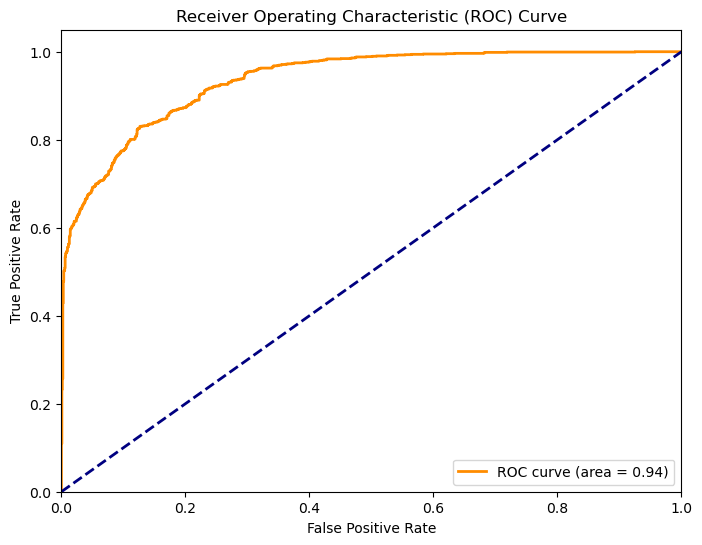

In [43]:
# Map class labels to binary labels (0 and 1)
y_test_binary = (y_test == 20).astype(int)  # Class 20 becomes 1, Class 10 becomes 0
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

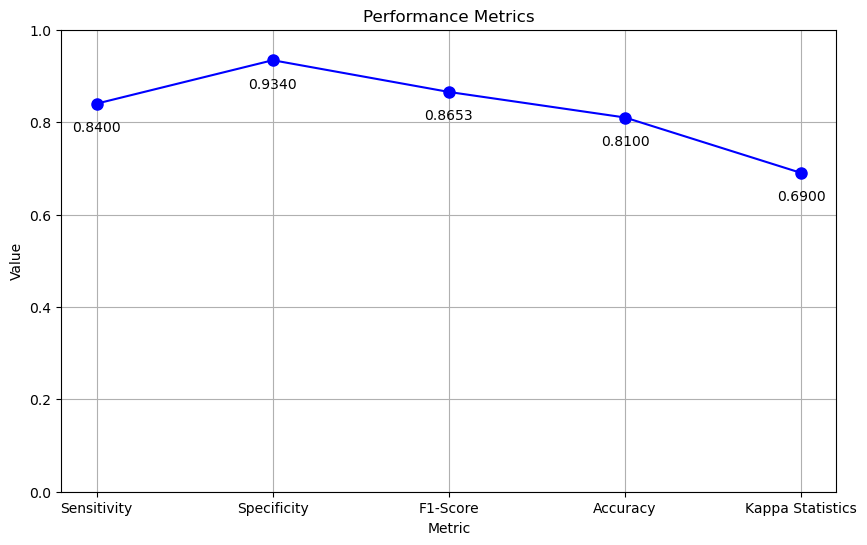

In [1]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.84, 0.934, 0.8653, 0.81, 0.69]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Logistic Regression/line chart test data.svg", format='svg')


# Show the plot
plt.show()

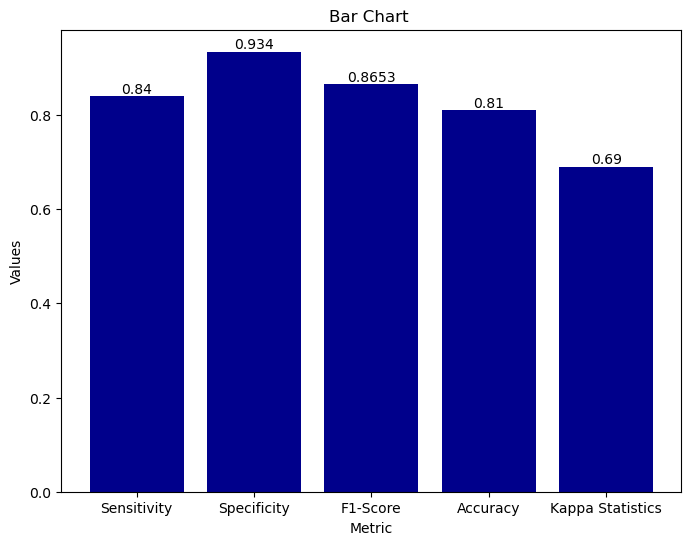

In [2]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Logistic Regression/bar chart test data.svg", format='svg')


# Show the plot
plt.show()
